In [ ]:
import pandas as pd
import networkx as nx
import json
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Function to visualize the graph
def visualize_graph(G, title="Graph Visualization", max_nodes=100):

    plt.figure(figsize=(10, 10))
    subgraph = G if G.number_of_nodes() <= max_nodes else G.subgraph(list(G.nodes)[:max_nodes])
    pos = nx.spring_layout(subgraph)  # Layout for visualization
    nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
    plt.title(title)
    plt.show()

In [ ]:
edges_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_edges.csv'
edges_df = pd.read_csv(edges_file)
edges_df.head()

,node_1,node_2
0,0,14270
1,0,16976
2,0,12029
3,0,3001
4,0,14581


In [ ]:
edges_df.isnull().sum()


,0
node_1,0
node_2,0


In [ ]:
edges_df.dropna(inplace=True)


In [ ]:
G = nx.Graph()

# Add edges to the graph from the dataframe
G.add_edges_from(edges_df[['node_1', 'node_2']].values)

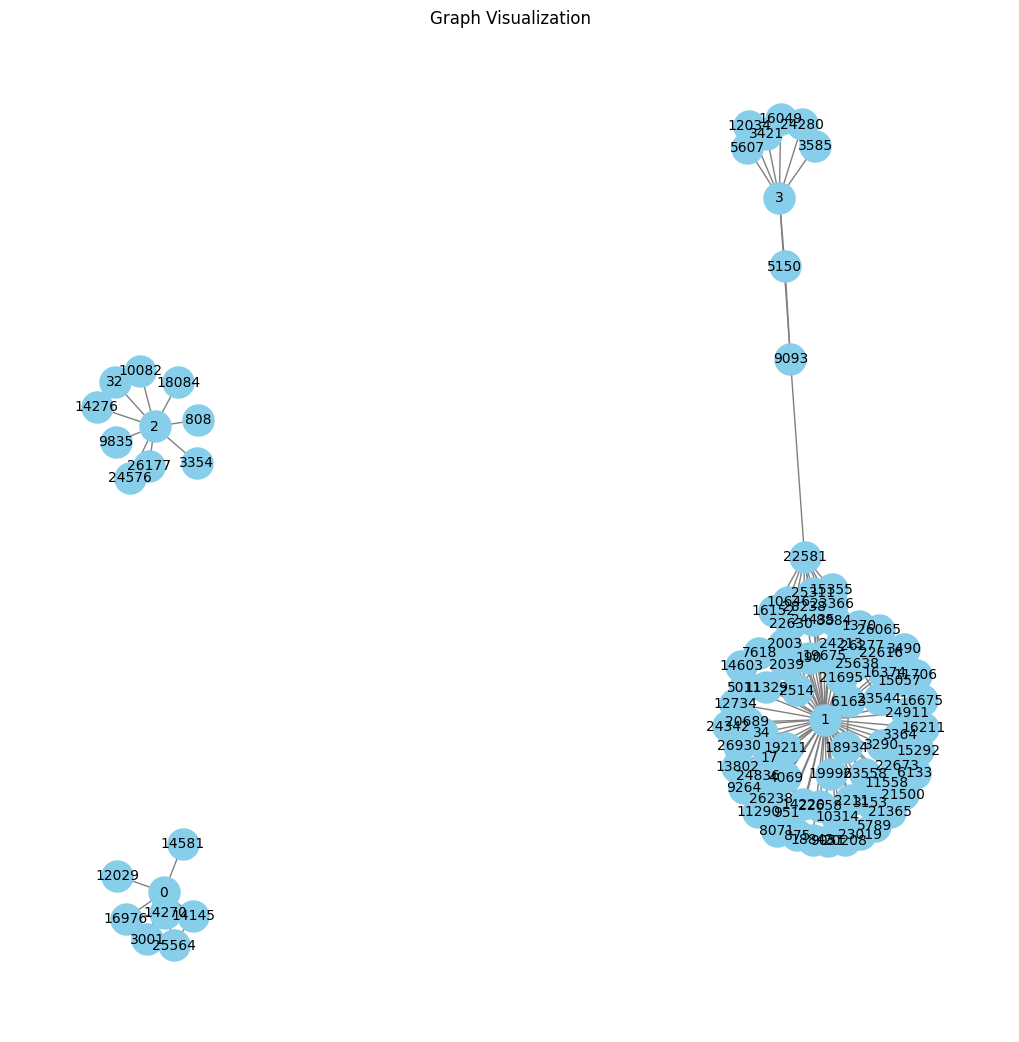

In [ ]:
visualize_graph(G)

In [ ]:
target_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_target.csv'
target_df = pd.read_csv(target_file)
target_df.head()

,id,target
0,0,0
1,1,0
2,2,0
3,3,1
4,4,0


In [ ]:
print("Data type of 'id' column in target_df:", target_df['id'].dtype)

Data type of 'id' column in target_df: int64


In [ ]:
target_df.isnull().sum()


,0
id,0
target,0


In [ ]:
target_df.dropna(inplace=True)


In [ ]:
node_labels = dict(zip(target_df['id'], target_df['target']))

nx.set_node_attributes(G, node_labels, 'gender')


In [ ]:
features_file = '/content/drive/MyDrive/deezer_europe/deezer_europe_features.json'

with open(features_file) as f:
    node_features = json.load(f)

In [ ]:
print("\nFeature Data (first 5 keys):")
feature_keys = list(node_features.keys())[:5]
print(feature_keys)
print("Data type of feature keys:", type(feature_keys[0]))


Feature Data (first 5 keys):
['0', '1', '2', '3', '4']
Data type of feature keys: <class 'str'>


In [ ]:
if target_df['id'].dtype == 'int64':
    print("\nTarget IDs are integers.")
    target_df['id'] = target_df['id'].astype(str)  # Convert target IDs to strings for consistency
    print("Converted target_df['id'] to strings.")
else:
    print("\nTarget IDs are already strings.")

if isinstance(feature_keys[0], str):
    print("\nFeature keys are strings.")
    # If target_df IDs are already strings, no conversion needed for node_features
else:
    print("\nFeature keys are not strings.")
    # Convert feature keys to strings if they are integers
    node_features = {str(key): value for key, value in node_features.items()}
    print("Converted feature keys to strings.")


Target IDs are integers.
Converted target_df['id'] to strings.

Feature keys are strings.


In [ ]:
nx.set_node_attributes(G, node_features, 'features')

In [ ]:
valid_nodes = set(target_df['id']).intersection(set(node_features.keys()))


In [ ]:
# Inspect the first few nodes from the graph
print(f"Total nodes in the graph before any processing: {G.number_of_nodes()}")
print(f"Nodes in the graph (first 10): {list(G.nodes())[:10]}")



Total nodes in the graph before any processing: 28281
Nodes in the graph (first 10): [0, 14270, 16976, 12029, 3001, 14581, 14145, 25564, 1, 26065]


In [ ]:
# Print first few rows of the edge list
print("First 5 rows of the edge list (from deezer_edges.csv):")
print(edges_df.head())

# Print first few rows of the target data
print("\nFirst 5 rows of the target data (from deezer_target.csv):")
print(target_df.head())

# Print first 5 feature keys
print("\nFirst 5 feature keys (from deezer_features.json):")
print(list(node_features.keys())[:5])


First 5 rows of the edge list (from deezer_edges.csv):
   node_1  node_2
0       0   14270
1       0   16976
2       0   12029
3       0    3001
4       0   14581

First 5 rows of the target data (from deezer_target.csv):
  id  target
0  0       0
1  1       0
2  2       0
3  3       1
4  4       0

First 5 feature keys (from deezer_features.json):
['0', '1', '2', '3', '4']


In [ ]:
# Print details about valid nodes and graph nodes
print(f"\nTotal nodes in target data: {len(target_df['id'])}")
print(f"Total nodes in feature data: {len(node_features)}")
print(f"Total nodes in the graph before removal: {G.number_of_nodes()}")

# Check valid nodes
valid_nodes = set(target_df['id']).intersection(set(node_features.keys()))
print(f"Valid nodes (size): {len(valid_nodes)}")
print(f"Valid nodes (first 10): {list(valid_nodes)[:10]}")

# Compare valid nodes with graph nodes
nodes_in_graph = set(G.nodes())
print(f"Nodes in graph (size): {len(nodes_in_graph)}")
print(f"Nodes in graph (first 10): {list(nodes_in_graph)[:10]}")

# Nodes to be removed
nodes_to_remove = nodes_in_graph - valid_nodes
print(f"Nodes to remove (size): {len(nodes_to_remove)}")
print(f"Nodes to remove (first 10): {list(nodes_to_remove)[:10]}")



Total nodes in target data: 28281
Total nodes in feature data: 28281
Total nodes in the graph before removal: 28281
Valid nodes (size): 28281
Valid nodes (first 10): ['3334', '18267', '23098', '13085', '5047', '541', '25801', '21', '19174', '4093']
Nodes in graph (size): 28281
Nodes in graph (first 10): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Nodes to remove (size): 28281
Nodes to remove (first 10): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
# Convert edge list nodes to strings
edges_df['node_1'] = edges_df['node_1'].astype(str)
edges_df['node_2'] = edges_df['node_2'].astype(str)

# Convert target_df['id'] to strings
target_df['id'] = target_df['id'].astype(str)

# Rebuild the graph with string IDs
G = nx.from_pandas_edgelist(edges_df, 'node_1', 'node_2')

# Recalculate valid nodes and nodes to remove
valid_nodes = set(target_df['id']).intersection(set(node_features.keys()))
nodes_to_remove = set(G.nodes()) - valid_nodes

# Check results after conversion
print(f"Total nodes in the graph after loading: {G.number_of_nodes()}")
print(f"Valid nodes after ID conversion: {len(valid_nodes)}")

# Remove invalid nodes
G.remove_nodes_from(nodes_to_remove)



Total nodes in the graph after loading: 28281
Valid nodes after ID conversion: 28281


In [ ]:
#preprocessing
for node, data in G.nodes(data=True):
    if data.get('gender') == 'male':
        G.nodes[node]['gender'] = 1
    elif data.get('gender') == 'female':
        G.nodes[node]['gender'] = 0



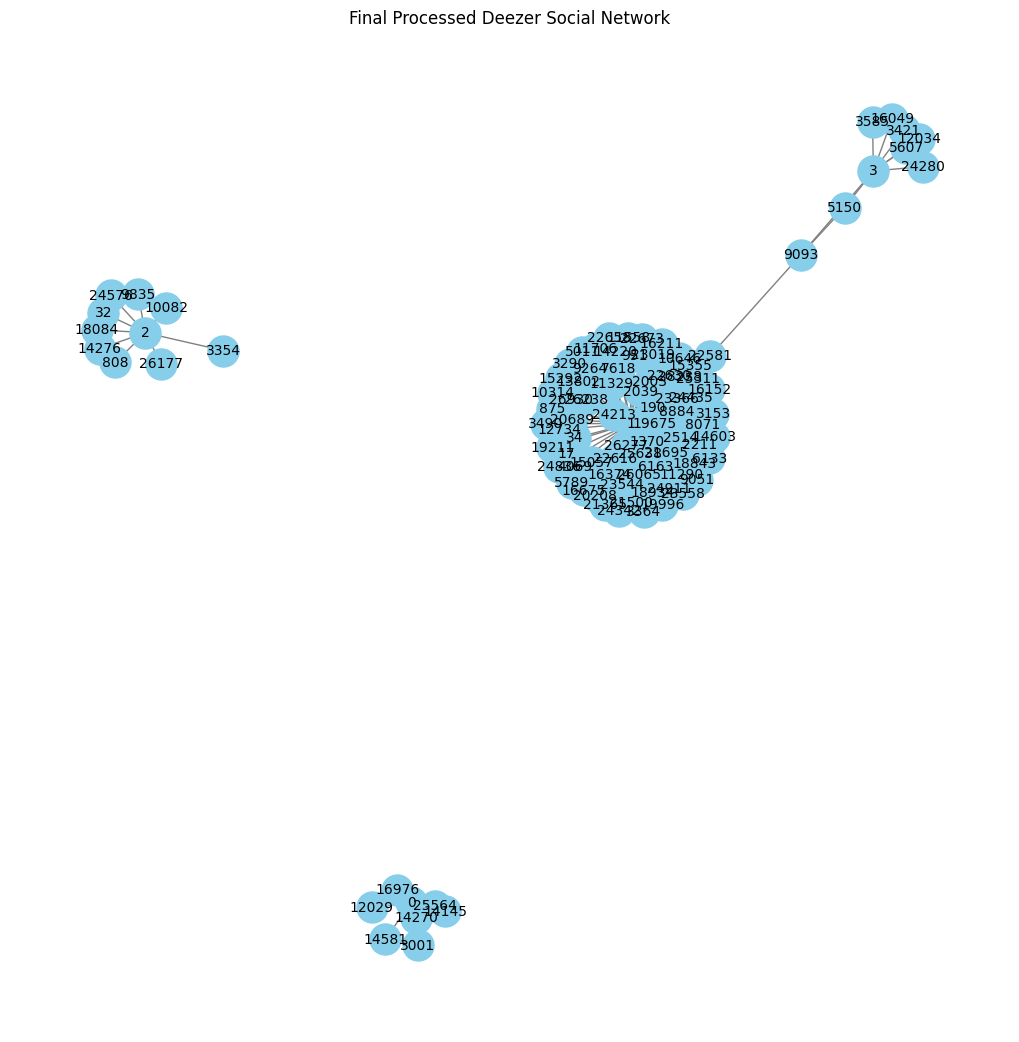

In [ ]:
# Final graph visualization after all preprocessing
visualize_graph(G, title="Final Processed Deezer Social Network")



In [ ]:
# Summary of the graph
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")


Number of nodes: 28281
Number of edges: 92752


In [ ]:
all_nodes = list(G.nodes)

# Check if the graph is empty before trying to access a node
if all_nodes:
    # Access the first node in the list if it exists
    first_node = all_nodes[0]
    print(f"Example node attributes (node id {first_node}): {G.nodes[first_node]}")
else:
    print("The graph is empty, no nodes to display.")

Example node attributes (node id 0): {}


In [ ]:
# Step 1: Create a dictionary that maps node IDs to gender labels from deezer_target.csv
# Assuming 'target' column contains the gender (1 for male, 0 for female)
gender_dict = dict(zip(target_df['id'], target_df['target']))

# Step 2: Assign the gender attribute to each node in the graph
for node in G.nodes():
    if node in gender_dict:
        G.nodes[node]['gender'] = gender_dict[node]

# Step 3: Verify that gender attributes have been added
# Check node 0 for example
print(f"Example node attributes (node id 0): {G.nodes['0']}")  # Note that node ID is now a string




Example node attributes (node id 0): {'gender': 0}


In [ ]:
# Cross-check random nodes with their gender labels in the graph and target_df
import random

# Sample 5 random nodes from the graph for comparison
sample_nodes = random.sample(list(G.nodes()), 5)

# Loop through the sampled nodes and compare their gender attribute in the graph and target_df
for node in sample_nodes:
    # Get the gender from the graph
    graph_gender = G.nodes[node].get('gender', None)

    # Get the gender from the target dataframe (ensure node is cast to correct type, usually string)
    original_gender = target_df[target_df['id'] == str(node)]['target'].values[0]

    # Print comparison
    print(f"Node {node}: Graph gender = {graph_gender}, Target gender = {original_gender}")


Node 10458: Graph gender = 0, Target gender = 0
Node 17150: Graph gender = 1, Target gender = 1
Node 3026: Graph gender = 1, Target gender = 1
Node 8093: Graph gender = 1, Target gender = 1
Node 6062: Graph gender = 0, Target gender = 0


In [ ]:
# # Check all nodes and compare their gender attribute with the target dataframe
# mismatch_count = 0

# for node in G.nodes():
#     # Get the gender from the graph
#     graph_gender = G.nodes[node].get('gender', None)

#     # Get the gender from the target dataframe (ensure node is cast to correct type)
#     original_gender = target_df[target_df['id'] == str(node)]['target'].values[0]

#     # Compare genders
#     if graph_gender != original_gender:
#         mismatch_count += 1
#         print(f"Mismatch for Node {node}: Graph gender = {graph_gender}, Target gender = {original_gender}")

# print(f"Total mismatches: {mismatch_count}")


In [ ]:
df_features = pd.DataFrame(list(node_features.items()), columns=['user_id', 'artists'])

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine your features (artists) and target (gender) dataframes
df = pd.concat([df_features, target_df], axis=1)



In [ ]:
# Convert list of artists to a space-separated string (TfidfVectorizer expects a string input)
df_features['artists_str'] = df_features['artists'].apply(lambda x: ' '.join(str(i) for i in x))

In [ ]:
df_features.head()

,user_id,artists,artists_str
0,0,"[81, 213, 574, 577, 697, 766, 1051, 1074, 1252...",81 213 574 577 697 766 1051 1074 1252 1309 133...
1,1,"[0, 10, 12, 13, 16, 25, 32, 35, 71, 76, 80, 98...",0 10 12 13 16 25 32 35 71 76 80 98 101 168 172...
2,2,"[35, 83, 103, 258, 361, 523, 675, 711, 744, 22...",35 83 103 258 361 523 675 711 744 2259 2264 24...
3,3,"[24, 108, 251, 395, 407, 418, 451, 627, 675, 7...",24 108 251 395 407 418 451 627 675 764 796 857...
4,4,[],


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = df_features.join(target_df, how='inner')

# Convert list of artists to a space-separated string for the TfidfVectorizer
df['artists_str'] = df['artists'].apply(lambda x: ' '.join(str(i) for i in x))



In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df['artists_str'], df['target'], test_size=0.2, random_state=42)

In [ ]:

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22624,)
y_train shape: (22624,)
X_test shape: (5657,)
y_test shape: (5657,)


In [ ]:
# Initialize the TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000)  # You can adjust max_features based on memory and performance

# Fit the vectorizer on the training data and transform both train and test sets
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# You can now use X_train_tfidf and X_test_tfidf in your machine learning models
print("TF-IDF transformation complete.")
print("Shape of training data:", X_train_tfidf.shape)
print("Shape of test data:", X_test_tfidf.shape)

TF-IDF transformation complete.
Shape of training data: (22624, 1000)
Shape of test data: (5657, 1000)


In [ ]:
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train_tfidf)
X_test_scaled = scaler.transform(X_test_tfidf)

In [ ]:
# Step 4: Logistic Regression model training
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)




LogisticRegression(random_state=42)

In [ ]:
# Step 5: Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)

# Step 6: Evaluate the Logistic Regression model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")



Logistic Regression - Accuracy: 0.6544, Precision: 0.6506, Recall: 0.4655, F1-Score: 0.5427


In [ ]:
# Step 7: Cross-validation for robustness
import numpy as np
cv_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation Accuracy: {np.mean(cv_scores):.4f}")

Cross-validation Accuracy: 0.6534


In [ ]:
# Check the shapes of X_train_tfidf and y_train
print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of y_train:", y_train.shape)

# If you have test data
print("Shape of X_test_tfidf:", X_test_tfidf.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train_tfidf: (22624, 1000)
Shape of y_train: (22624,)
Shape of X_test_tfidf: (5657, 1000)
Shape of y_test: (5657,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
import json

# Assuming X_train_tfidf and y_train are already defined (from previous TF-IDF steps)

# Step 1: Split data into training and testing sets (if not done already)
# This is to ensure we have a test set to evaluate performance
#X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_train, test_size=0.2, random_state=42)

# Step 2: Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_tfidf, y_train)

# Step 3: Make predictions and evaluate the model
y_pred = dt_classifier.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 4: Extract feature importances
# Get feature importances and corresponding feature names
importances = dt_classifier.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))


Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.74      0.67      3165
           1       0.54      0.40      0.46      2492

    accuracy                           0.59      5657
   macro avg       0.58      0.57      0.56      5657
weighted avg       0.58      0.59      0.58      5657

Top 10 Important Features:
    Feature  Importance
370   21342    0.032771
146     138    0.012418
445   24306    0.012300
738     505    0.010253
40      108    0.009767
320   19899    0.009489
78       12    0.009437
819     675    0.008262
460      25    0.008102
747     523    0.006659


In [ ]:


from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_classifier = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)





GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [ ]:
# Get the best model and its hyperparameters
best_dt_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# Step 3: Make predictions and evaluate the best model
y_pred = best_dt_classifier.predict(X_test_tfidf)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.90      0.72      3165
           1       0.65      0.24      0.34      2492

    accuracy                           0.61      5657
   macro avg       0.62      0.57      0.53      5657
weighted avg       0.62      0.61      0.55      5657



In [ ]:
importances = best_dt_classifier.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

Top 10 Important Features:
    Feature  Importance
370   21342    0.144556
445   24306    0.058853
146     138    0.050943
78       12    0.038836
40      108    0.036259
320   19899    0.034765
483     263    0.030290
53    11058    0.026339
845     716    0.021553
811    6581    0.021480


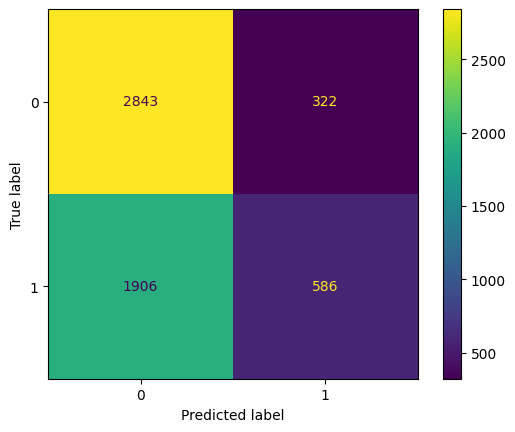

In [ ]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have y_test and y_pred from your model
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)

# Plot the confusion matrix
disp.plot()
plt.show()

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)

# Train the model
rf_classifier.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")





Random Forest - Accuracy: 0.6558, Precision: 0.6569, Recall: 0.4579, F1-Score: 0.5396


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_tfidf, y_train)

best_rf_classifier = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

y_pred = best_rf_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Best Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest - Accuracy: 0.6558, Precision: 0.6569, Recall: 0.4579, F1-Score: 0.5396


In [ ]:
# Calculate degree centrality
degree_centrality = nx.degree_centrality(G)
nx.set_node_attributes(G, degree_centrality, 'degree_centrality')
print("Degree Centrality:", degree_centrality)


Degree Centrality: {'0': 0.00024752475247524753, '14270': 0.00021216407355021216, '16976': 0.0007779349363507779, '12029': 0.0003182461103253182, '3001': 0.00014144271570014144, '14581': 0.00010608203677510608, '14145': 0.00045968882602545966, '25564': 0.0016619519094766618, '1': 0.0025459688826025458, '26065': 0.00010608203677510608, '2514': 0.00014144271570014144, '16675': 3.536067892503536e-05, '19675': 0.0004950495049504951, '34': 0.00021216407355021216, '190': 0.00017680339462517678, '2211': 7.072135785007072e-05, '2003': 0.0010608203677510608, '11290': 0.00035360678925035356, '5011': 7.072135785007072e-05, '24836': 0.0015558698727015559, '18843': 0.0004950495049504951, '10646': 0.001096181046676096, '22658': 7.072135785007072e-05, '6133': 3.536067892503536e-05, '21695': 0.0003182461103253182, '23366': 0.00038896746817538896, '20208': 3.536067892503536e-05, '26238': 0.00010608203677510608, '16152': 0.0015558698727015559, '24911': 7.072135785007072e-05, '10314': 0.00010608203677510

In [ ]:
# Calculate closeness centrality
closeness_centrality = nx.closeness_centrality(G)
nx.set_node_attributes(G, closeness_centrality, 'closeness_centrality')
print("Closeness Centrality:", closeness_centrality)


Closeness Centrality: {'0': 0.18028815504271326, '14270': 0.17764488611379825, '16976': 0.18842530282637954, '12029': 0.18102907475450972, '3001': 0.16259882133103348, '14581': 0.1684426205097355, '14145': 0.19167943173961963, '25564': 0.21203055999160275, '1': 0.16515218762409772, '26065': 0.14229646774680488, '2514': 0.14196217019396812, '16675': 0.14174372854171366, '19675': 0.15331985188478242, '34': 0.1518112129866226, '190': 0.14316305299766627, '2211': 0.14174799131868737, '2003': 0.15471136592411047, '11290': 0.16479034100179474, '5011': 0.14174799131868737, '24836': 0.14314783506615777, '18843': 0.15353044006992475, '10646': 0.15955226069981834, '22658': 0.1417451494388837, '6133': 0.14174372854171366, '21695': 0.145898036464191, '23366': 0.15480113418652772, '20208': 0.14174372854171366, '26238': 0.15053042279460688, '16152': 0.1599755624317643, '24911': 0.14332557915596034, '10314': 0.14488001803315642, '17': 0.14204987819273174, '12734': 0.1525803231810947, '13802': 0.17861

In [ ]:
# Calculate eigenvector centrality
try:
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=500)  # Increase max_iter
    nx.set_node_attributes(G, eigenvector_centrality, 'eigenvector_centrality')
    print("Eigenvector Centrality:", eigenvector_centrality)
except nx.PowerIterationFailedConvergence as e:
    print("Eigenvector centrality failed to converge:", e)
    # Consider further analysis or modifications to the graph structure

Eigenvector Centrality: {'0': 4.808873842496239e-05, '14270': 4.637387680270248e-05, '16976': 0.00012049776419544188, '12029': 9.036583272755666e-05, '3001': 3.6542965389803943e-06, '14581': 1.3230982361161142e-05, '14145': 0.00013674296327777807, '25564': 0.0007550492359358769, '1': 0.004330547424641361, '26065': 0.00020762878989365958, '2514': 0.00021276520959836006, '16675': 0.00017485363475852633, '19675': 0.0009217622073485125, '34': 0.00021442095868113144, '190': 0.000524211807303378, '2211': 0.00017542656116255147, '2003': 0.0015799928834324623, '11290': 0.0017469416505975941, '5011': 0.00017542656116255147, '24836': 0.0002367807070414029, '18843': 0.000936475141349841, '10646': 0.0050746788039875606, '22658': 0.00017513916163769722, '6133': 0.00017485363475852633, '21695': 0.000351389434692511, '23366': 0.0019100624561450318, '20208': 0.00017485363475852633, '26238': 0.00039003776182202623, '16152': 0.004099874067176231, '24911': 0.00017513976333069777, '10314': 0.0001867834580

In [ ]:
# Calculate betweenness centrality
betweenness_centrality = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_centrality, 'betweenness_centrality')
print("Betweenness Centrality:", betweenness_centrality)


KeyboardInterrupt: 

In [ ]:
degree_centrality_values = np.array(list(degree_centrality.values()))
closeness_centrality_values = np.array(list(closeness_centrality.values()))
# betweenness_centrality_values = np.array(list(betweenness_centrality.values()))
eigenvector_centrality_values = np.array(list(eigenvector_centrality.values()))

# Stack them to create a centrality feature matrix
centrality_features = np.vstack((
    degree_centrality_values,
    closeness_centrality_values,
    eigenvector_centrality_values
)).T

In [ ]:
from scipy.sparse import hstack

# Assuming X_train_tfidf and X_test_tfidf are your original feature matrices
# Use X_train_tfidf.shape[0] to get the number of rows
X_train_combined = hstack([X_train_tfidf, centrality_features[:X_train_tfidf.shape[0]]])
X_test_combined = hstack([X_test_tfidf, centrality_features[X_train_tfidf.shape[0]:]])

# Make sure the shape of centrality features matches your X_train and X_test

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)

# Train the model
rf_classifier.fit(X_train_combined, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_combined)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multiclass
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Random Forest - Accuracy: 0.6581, Precision: 0.6597, Recall: 0.6581, F1-Score: 0.6443


In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Initialize models
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('svm', svm_model),
    ('rf', rf_model),
    ('gb', gb_model)], voting='soft')

# Train the Voting Classifier
voting_clf.fit(X_train_combined, y_train)

# Evaluate the Voting Classifier
y_pred = voting_clf.predict(X_test_combined)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Voting Classifier - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


Voting Classifier - Accuracy: 0.6574, Precision: 0.6585, Recall: 0.6574, F1-Score: 0.6442


In [ ]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train_combined.toarray())
X_test_pca = pca.transform(X_test_combined.toarray())


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Get the number of unique classes in y_train
n_classes = len(y_train.unique())

# Apply LDA for dimensionality reduction
# Set n_components to be at most n_classes - 1
lda = LinearDiscriminantAnalysis(n_components=min(n_classes - 1, X_train_combined.shape[1]))
X_train_lda = lda.fit_transform(X_train_combined.toarray(), y_train)
X_test_lda = lda.transform(X_test_combined.toarray())

In [ ]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_leaf=4, min_samples_split=2, random_state=42)

# Train the model on reduced feature space
rf_classifier.fit(X_train_pca, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")


In [ ]:


# Analyze gender distribution in predictions
predicted_gender_counts = pd.Series(y_pred).value_counts()
print("Predicted Gender Distribution:")
print(predicted_gender_counts)

# Analyze gender distribution in the actual test set
actual_gender_counts = pd.Series(y_test).value_counts()
print("\nActual Gender Distribution:")
print(actual_gender_counts)

# Calculate the percentage of correctly predicted genders for each gender
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Assuming 0 represents female and 1 represents male
correctly_predicted_female = cm[0, 0]
total_female = actual_gender_counts.get(0, 0)
correctly_predicted_male = cm[1, 1]
total_male = actual_gender_counts.get(1, 0)

if total_female > 0:
  female_accuracy = correctly_predicted_female / total_female
  print(f"\nFemale prediction accuracy: {female_accuracy:.2%}")
else:
  print("\nNo female instances in the test set.")

if total_male > 0:
  male_accuracy = correctly_predicted_male / total_male
  print(f"Male prediction accuracy: {male_accuracy:.2%}")
else:
  print("\nNo male instances in the test set.")


Predicted Gender Distribution:
0    4044
1    1613
Name: count, dtype: int64

Actual Gender Distribution:
target
0    3165
1    2492
Name: count, dtype: int64

Female prediction accuracy: 83.10%
Male prediction accuracy: 43.26%


In [ ]:

def find_node_with_max_degree(graph):
  """
  Finds the node with the maximum degree in a graph.

  Args:
    graph: A NetworkX graph.

  Returns:
    A tuple containing the node with the maximum degree and its degree.
  """
  if not graph.nodes():
    return None, 0

  node_degrees = graph.degree()
  max_degree_node = max(node_degrees, key=lambda x: x[1])  # Find node with highest degree
  return max_degree_node

# Assuming 'G' is your graph
max_degree_node, max_degree = find_node_with_max_degree(G)

if max_degree_node:
  print(f"Node with maximum degree: {max_degree_node[0]} (degree: {max_degree_node[1]})")
else:
  print("Graph is empty.")

Node with maximum degree: 8 (degree: 6)


In [ ]:

# Assuming you have the 'degree_centrality' dictionary calculated earlier
sorted_degree_centrality = dict(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))

# Get the top 10 nodes with highest degree centrality
top_10_nodes = list(sorted_degree_centrality.keys())[:10]

print("Top 10 Nodes based on Degree Centrality:")
top_10_nodes

Top 10 Nodes based on Degree Centrality:


['867',
 '396',
 '1878',
 '24904',
 '5989',
 '24069',
 '17963',
 '23143',
 '11080',
 '21798']

In [ ]:


importances = best_rf_classifier.feature_importances_
feature_names = tfidf.get_feature_names_out()

# Create a DataFrame to hold feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Assuming 'top_10_nodes' is a list of node IDs for the top 10 nodes
for node_id in top_10_nodes:
  if node_id in node_features:
    print(f"Node {node_id}: Features - {node_features[node_id]}")
  else:
    print(f"Node {node_id}: Features not found.")

Top 10 Important Features:
    Feature  Importance
370   21342    0.024298
146     138    0.012801
320   19899    0.011830
78       12    0.011490
40      108    0.011485
445   24306    0.010745
53    11058    0.009794
147   13804    0.008705
747     523    0.008671
773    5842    0.008628
Node 867: Features - [0, 32, 49, 90, 109, 110, 137, 174, 327, 387, 432, 790, 1101, 1677, 1791, 2009, 2213, 2875, 4282, 5842, 7168, 8033, 8427, 8614, 9859, 10156, 10365, 10813, 11014, 12109, 13227, 13558, 13753, 13817, 14312, 14453, 14709, 14962, 15805, 19008, 19379, 19465, 19522, 22176, 22967, 23318, 24040, 24740, 24754, 25355, 26231, 26589, 27737, 28175, 28859, 28944, 29592, 29987]
Node 396: Features - []
Node 1878: Features - [16, 49, 82, 87, 88, 90, 95, 97, 108, 109, 110, 325, 387, 432, 505, 514, 620, 753, 843, 921, 1063, 1101, 1264, 1785, 2282, 4302, 4531, 4536, 6987, 7168, 7920, 8028, 8183, 8349, 8427, 9240, 9571, 10350, 10571, 10813, 11058, 11088, 11374, 12020, 12123, 12357, 12407, 12449, 13227